<a href="https://colab.research.google.com/github/rajeevfromkrec/deep_learning/blob/master/Yolo_V3_with_Open_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5907, done.
remote: Total 5907 (delta 0), reused 0 (delta 0), pack-reused 5907
Receiving objects: 100% (5907/5907), 6.32 MiB | 7.96 MiB/s, done.
Resolving deltas: 100% (3923/3923), done.


In [2]:
!ls


darknet  sample_data


In [0]:
import os


In [4]:
os.listdir('darknet')

['README.md',
 'LICENSE.gen',
 'LICENSE.gpl',
 'cfg',
 'LICENSE.meta',
 'LICENSE',
 'LICENSE.mit',
 'LICENSE.v1',
 'Makefile',
 'examples',
 'scripts',
 'LICENSE.fuck',
 'src',
 'data',
 '.gitignore',
 'include',
 '.git',
 'python']

In [7]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-06-06 12:13:25--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   529KB/s    in 8m 56s  

2020-06-06 12:22:23 (452 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [13]:
os.listdir('./darknet/data')

['coco9k.map',
 'imagenet.shortnames.list',
 'imagenet.labels.list',
 '9k.names',
 'voc.names',
 '9k.tree',
 'labels',
 'goal.txt',
 'horses.jpg',
 'openimages.names',
 'scream.jpg',
 'coco.names',
 'giraffe.jpg',
 'eagle.jpg',
 'inet9k.map',
 'kite.jpg',
 'dog.jpg',
 '9k.labels',
 'person.jpg']

In [8]:
./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg -threshold 0

SyntaxError: ignored

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


In [0]:
net=cv2.dnn.readNet('yolov3.weights','/content/darknet/cfg/yolov3.cfg')

In [0]:


with open('./darknet/data/coco.names', 'r') as f:
  classes= [line.strip() for line in f.readlines()]

In [0]:
img = cv2.imread('./darknet/data/dog.jpg')
img=cv2.resize(img,None,fx=0.4,fy=0.4)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [0]:
height, width, _ =img.shape

In [16]:
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [0]:
layer_names=net.getLayerNames()

output_layers=[ net.getUnconnectedOutLayersNames()]

In [26]:
print(net.getUnconnectedOutLayersNames())

['yolo_82', 'yolo_94', 'yolo_106']


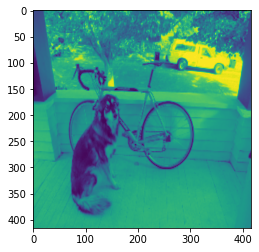

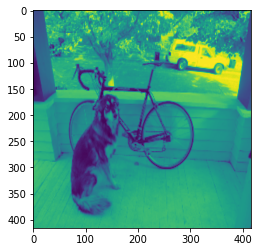

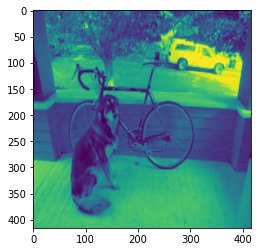

In [43]:
%matplotlib inline
from matplotlib import pyplot as plt
blob= cv2.dnn.blobFromImage(img, 1/255,(416,416),(0,0,0), swapRB=True, crop=False )

for b in blob:
  for blob_image in b:
    plt.imshow(blob_image)
    plt.show()

In [45]:
net.setInput(blob)

output_layers_names=net.getUnconnectedOutLayersNames()


layeroutputs=net.forward(output_layers_names)
print(layeroutputs[0])

[[0.0390017  0.0443966  0.38895732 ... 0.         0.         0.        ]
 [0.04649007 0.03663832 0.27167353 ... 0.         0.         0.        ]
 [0.04434776 0.03739661 0.7914295  ... 0.         0.         0.        ]
 ...
 [0.9565847  0.9506658  0.44007868 ... 0.         0.         0.        ]
 [0.96360314 0.96243846 0.3127648  ... 0.         0.         0.        ]
 [0.96480024 0.9637706  0.7825835  ... 0.         0.         0.        ]]


[2 0]


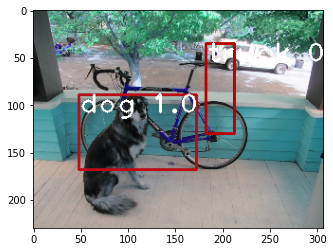

In [64]:
boxes=[]
confidences=[]
classids=[]

for output in layeroutputs:
  for detection in output:
    scores=detection[5:]
    class_id=np.argmax(scores)
    confidence=scores[class_id]
    if confidence >0.5:
      center_x=int(detection[0]*width)
      center_y=int(detection[1]*height)
      w=int(detection[2]*width)
      h=int(detection[3]*height)

      x=int(center_x- w/2)
      y=int(center_y- h/2)

      boxes.append([x,y,h,w])
      confidences.append(float(confidence))
      classids.append(class_id)

indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)
print(indexes.flatten())

font=cv2.FONT_HERSHEY_PLAIN
color=np.random.uniform(0,255,size=(len(boxes),3))

for i in indexes.flatten():
  x,y,w,h=boxes[i]
  label=str(classes[classids[i]])
  color=color[i]
  confidence=str(round(confidences[i],2))
  cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
  cv2.putText(img,label+" "+confidence,(x,y+20),font,2,(255,255,255),2)


plt.imshow(img)
plt.show()